In [52]:
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
import math
import numpy as np

In [53]:
dataset = MNIST(root='data', train=True, transform=transforms.ToTensor(), download=True)
data_loader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)

In [101]:
def show_image(img_tensor, label=None):
    if label:
        print(label)
    
    plt.imshow(img_tensor)
    

def random_mask_image(img_tensor, percentage=0.25):
    width, height = img_tensor.shape
    total_zeros_required = int(math.floor((width * height) * percentage))
    mask_indexes = torch.from_numpy(np.random.choice(range(width*height), total_zeros_required))
    
    mask = torch.zeros(width*height)
    mask[mask_indexes] = 1
    mask = mask.reshape(width, -1)
    
    new_img = img_tensor * mask
    return new_img   

In [93]:
images, labels = next(iter(data_loader))
image = images[0].reshape(28, 28)
label = labels[0]

tensor(4)


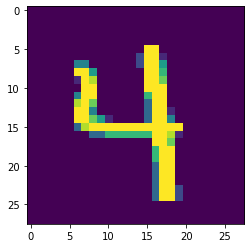

In [94]:
show_image(image, label=label)

Masked 4


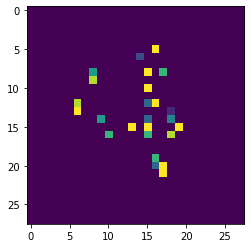

In [95]:
show_image(random_mask_image(image, percentage=0.25), label=f"Masked {labels[0]}")